In [1]:
%config Completer.use_jedi = False

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import vstack, csr_matrix

import pickle

In [2]:
with open('cleaned_dtypes.pkl', 'rb') as f:
    suitable_dtypes = pickle.load(f)

In [3]:
train_df = pd.read_csv('cleaned_train.csv', dtype=suitable_dtypes)

In [12]:
from collections import defaultdict

corr_dict = defaultdict(dict)

columns = train_df.columns

for i in range(len(columns)):
    corr_dict[columns[i]][columns[i]] = 1.0
    
    for j in range(i+1, len(columns)):
        corr = train_df[columns[i]].corr(train_df[columns[j]])
        corr_dict[columns[i]][columns[j]] = corr
        corr_dict[columns[j]][columns[i]] = corr

In [14]:
corr_df = pd.DataFrame(corr_dict)

In [39]:
corr_df.tail()

,IsBeta,OsBuildLab_3_other,OsBuildLab_3_rs1_release,OsBuildLab_3_rs1_release_inmarket,OsBuildLab_3_rs2_release,OsBuildLab_3_rs3_release,OsBuildLab_3_rs3_release_svc_escrow,OsBuildLab_3_rs4_release,OsBuildLab_3_th1,OsBuildLab_3_th2_release,...,Census_ProcessorCoreCount_8,Census_ProcessorCoreCount_12,Census_ProcessorCoreCount_16,Census_ProcessorCoreCount_24,Census_ProcessorCoreCount_32,Census_FlightRing,HasTpm,Census_OSUILocaleIdentifier,Census_FirmwareVersionIdentifier,HasDetections
Census_FlightRing,0.000486,0.056744,-0.022756,-0.011698,-0.026206,-0.010012,-0.027983,0.064600,-0.028144,-0.018159,...,0.024642,0.007649,0.002789,0.000655,0.000286,1.000000,0.012681,0.024653,-0.001696,-0.012831
HasTpm,-0.021834,-0.254265,0.012269,0.009200,0.030186,0.031943,0.040143,-0.012880,0.017856,0.010925,...,0.010612,0.008275,0.002215,-0.001342,-0.000552,0.012681,1.000000,-0.015656,0.008841,0.005490
Census_OSUILocaleIdentifier,-0.001482,0.020256,-0.005125,-0.002914,-0.003560,-0.004980,0.018038,0.006046,-0.040819,-0.006011,...,0.031276,0.023302,0.002037,-0.001344,-0.001626,0.024653,-0.015656,1.000000,0.012491,0.001786
Census_FirmwareVersionIdentifier,-0.000846,-0.003484,0.008607,0.005359,0.023953,0.009123,0.027888,-0.048873,-0.000251,0.001715,...,-0.029852,-0.053513,-0.024534,-0.005808,-0.005840,-0.001696,0.008841,0.012491,1.000000,-0.002038
HasDetections,-0.000040,-0.016414,-0.017714,-0.013070,-0.012951,-0.026476,0.014105,0.037387,-0.004140,-0.003994,...,0.036185,0.017399,0.005642,0.000107,-0.000037,-0.012831,0.005490,0.001786,-0.002038,1.000000


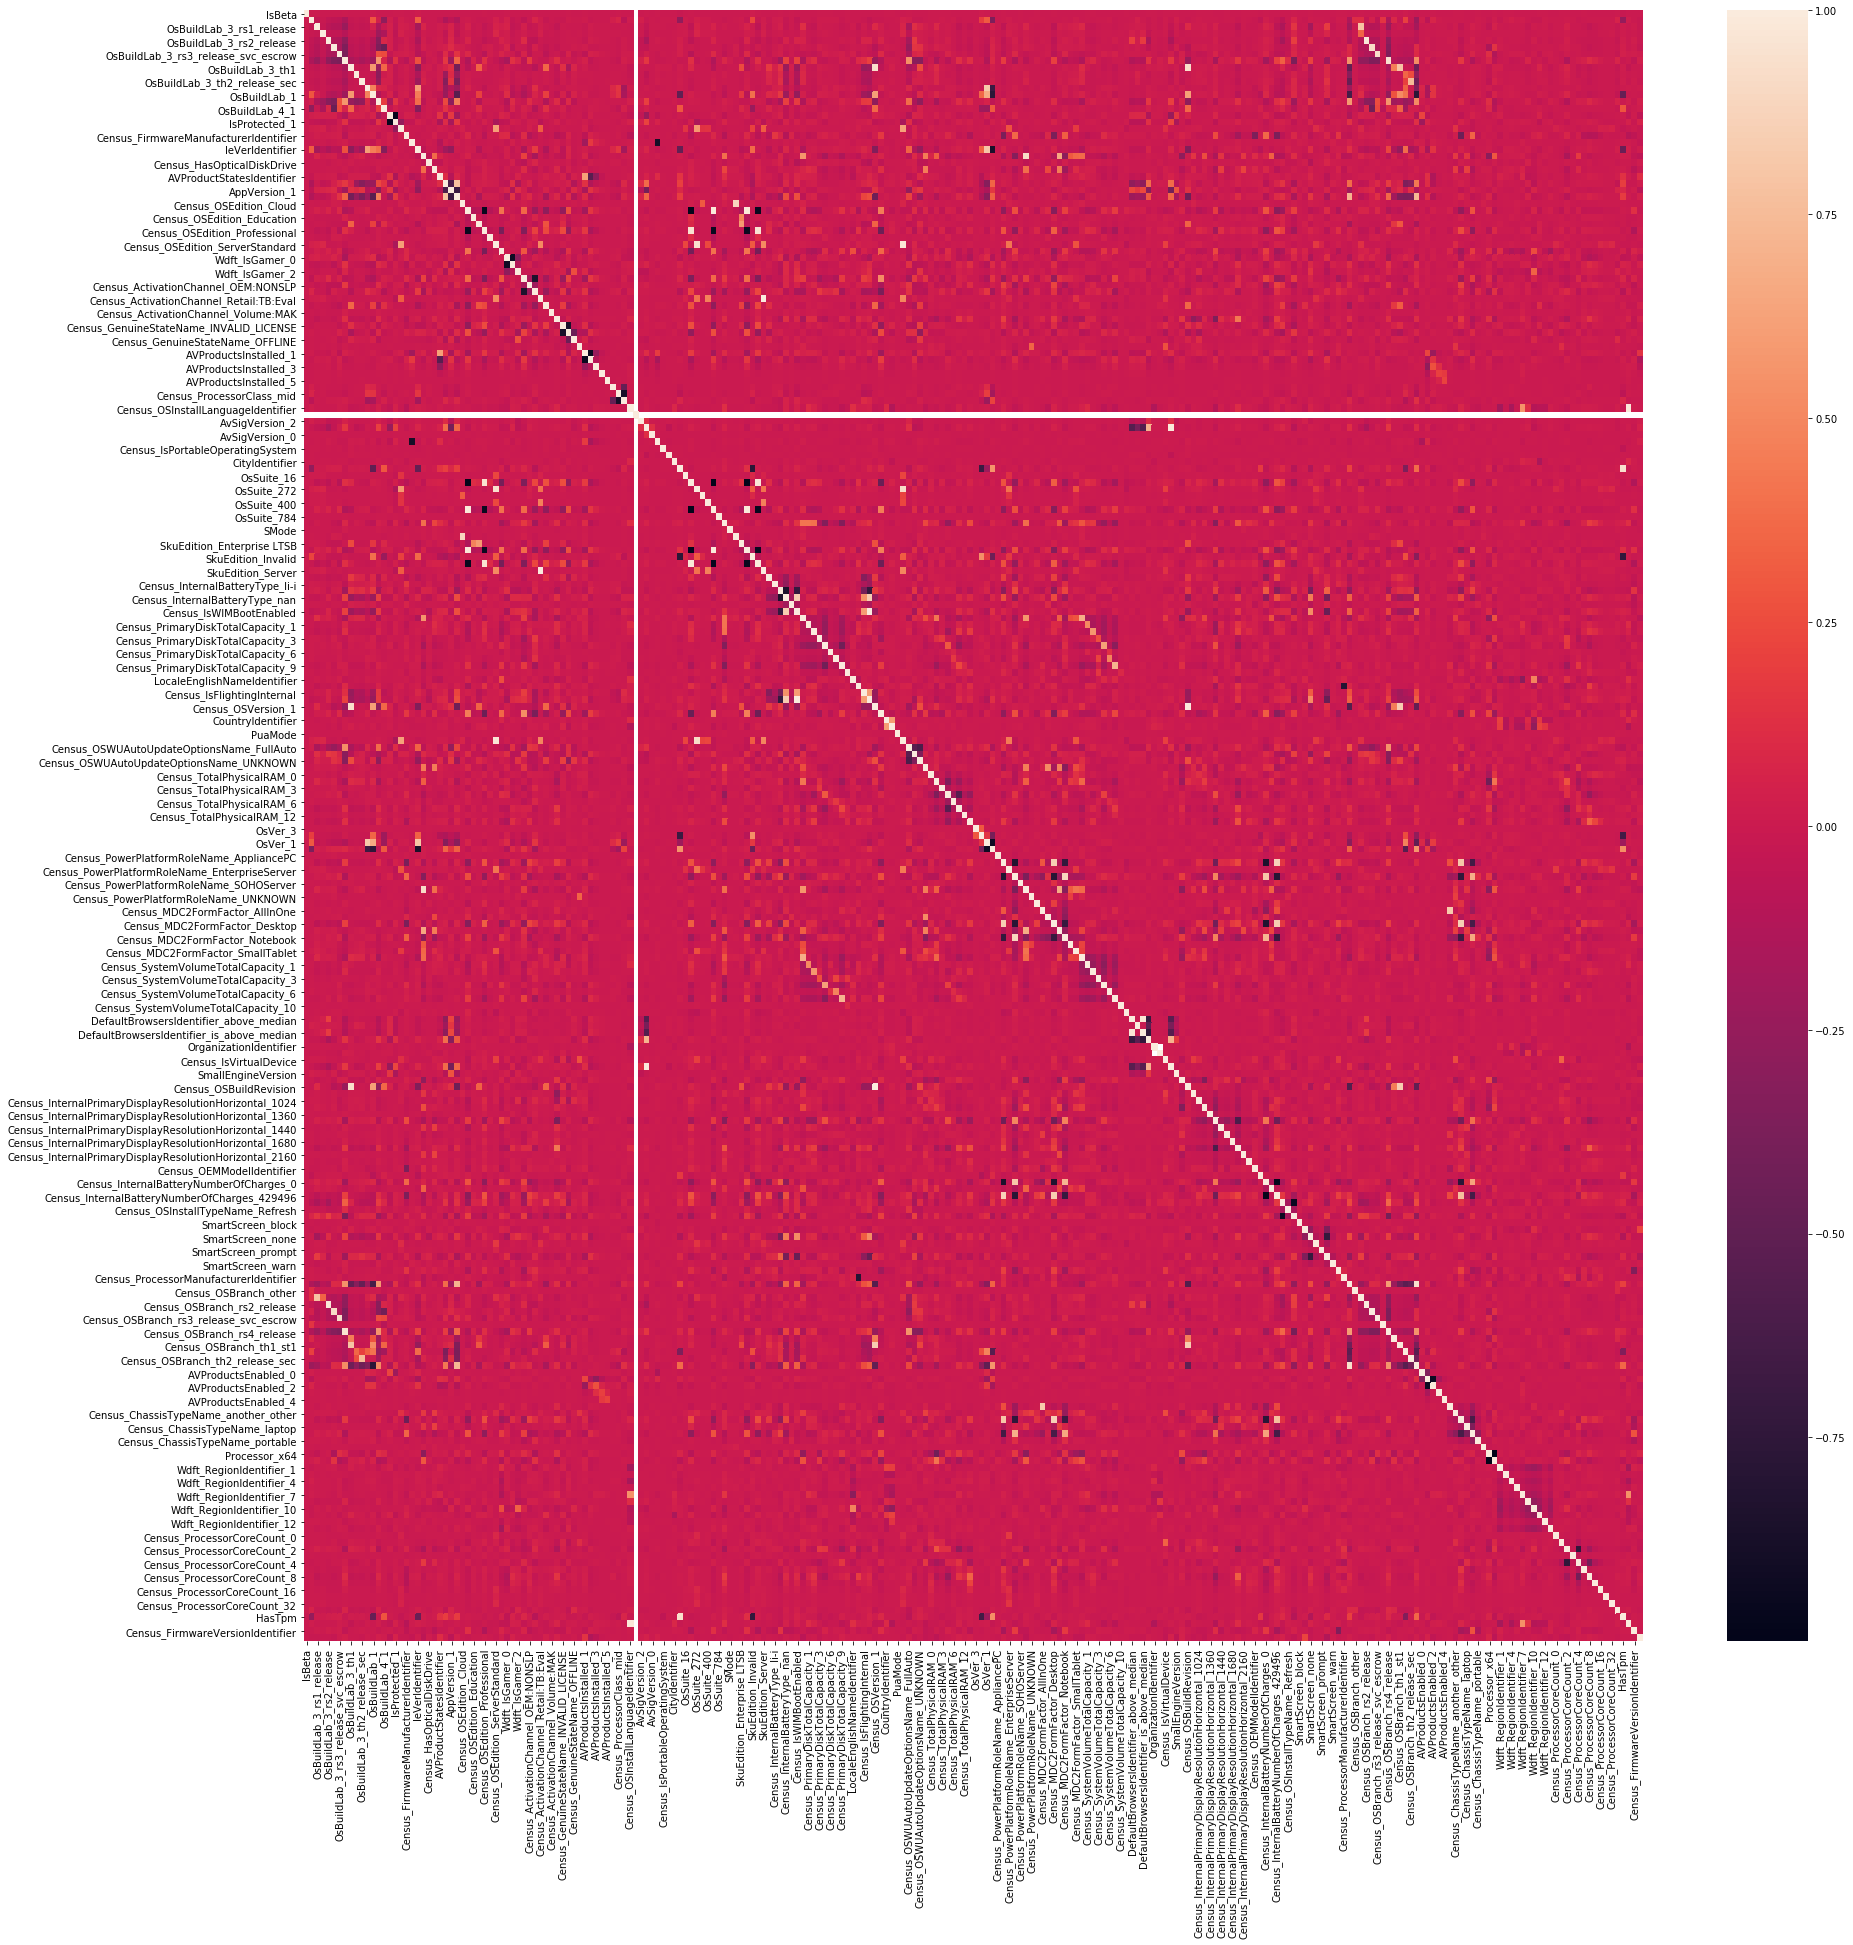

In [37]:
plt.subplots(figsize=(30,30))
sns.heatmap(corr_df)

Missing last two columns for some reason.

In [40]:
correlated = defaultdict(list)
absolutely_correlated = defaultdict(list)

for i in range(len(columns)):    
    for j in range(i+1, len(columns)):
        if columns[i] == columns[j]:
            continue
        if abs(corr_df[columns[i]][columns[j]]) > 0.95:
            correlated[columns[i]].append(columns[j])
        if abs(corr_df[columns[i]][columns[j]]) == 1.0:
            absolutely_correlated[columns[i]].append(columns[j])

In [42]:
absolutely_correlated

defaultdict(list,
            {'Census_ActivationChannel_Retail:TB:Eval': ['SkuEdition_Server']})

In [4]:
train_df.drop('Census_ActivationChannel_Retail:TB:Eval', axis=1, inplace=True)

In [41]:
correlated

defaultdict(list,
            {'OsBuildLab_3_rs2_release': ['Census_OSBranch_rs2_release'],
             'OsBuildLab_3_rs4_release': ['Census_OSBranch_rs4_release'],
             'IsProtected_0': ['IsProtected_1'],
             'Census_OSEdition_Core': ['Census_OSEdition_Professional',
              'OsSuite_256',
              'OsSuite_768',
              'SkuEdition_Home',
              'SkuEdition_Pro'],
             'Census_OSEdition_Professional': ['SkuEdition_Pro'],
             'Census_OSEdition_ServerStandard': ['Census_DeviceFamily'],
             'Census_ActivationChannel_Retail:TB:Eval': ['SkuEdition_Server'],
             'Census_OSInstallLanguageIdentifier': ['Census_OSUILocaleIdentifier'],
             'AvSigVersion_1': ['FullEngineVersion'],
             'OsSuite_256': ['OsSuite_768',
              'SkuEdition_Home',
              'SkuEdition_Pro'],
             'OsSuite_768': ['SkuEdition_Home', 'SkuEdition_Pro'],
             'SkuEdition_Home': ['SkuEdition_Pro'],
    

For DT it is not a problem, for LogReg I will use regularization.

In [5]:
train_df.to_csv('cleaned_train.csv', index=False)

del train_df

In [6]:
test_df = pd.read_csv('cleaned_test.csv', dtype=suitable_dtypes)

test_df.drop('Census_ActivationChannel_Retail:TB:Eval', axis=1, inplace=True)

test_df.to_csv('cleaned_test.csv', index=False)
del test_df

In [7]:
columns = pd.read_csv('cleaned_train.csv', nrows=5).columns

X = pd.read_csv(
    'cleaned_train.csv', 
    usecols=columns[:-1],
    dtype=suitable_dtypes
)
y = pd.read_csv(
    'cleaned_train.csv', 
    usecols=[columns[-1]],
    dtype=suitable_dtypes
)

In [17]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import roc_auc_score

def sample_importances(sample_X, sample_y, test_X, test_y):
    model = DTC(
        min_samples_leaf=1000,
#         max_depth=30
    )

    for df in sample_X, sample_y, test_X, test_y:
        df.reset_index(
            drop=True,
            inplace=True
        )
    
    model.fit(
        sample_X, 
        sample_y
    )
    
    predicted = model.predict(test_X)
    
    score = roc_auc_score(
        test_y, 
        predicted
    )
    
    return score, model.feature_importances_

In [ ]:
import time

start = time.perf_counter()

attempts_num = 100
attempt_importances = []
attempt_scores = []

for i in range(attempts_num):
    sample = np.random.choice(X.index, 10**6, replace=False)

    sample_X = X.loc[sample, :]
    sample_y = y.loc[sample, :]
    
    sample = np.random.choice(X.index, 10**6, replace=False)
    
    test_X = X.loc[sample, :]
    test_y = y.loc[sample, :]
    
    score, importances = sample_importances(
        sample_X, sample_y, 
        test_X, test_y
    )
    attempt_importances.append(importances)
    attempt_scores.append(score)

result_importances = np.mean(attempt_importances, axis=0)
score_mean = np.mean(attempt_scores)
score_max = max(attempt_scores)
print("Time: %f" % (time.perf_counter() - start))

Mean score: 0.635000
Max  score: 0.636363


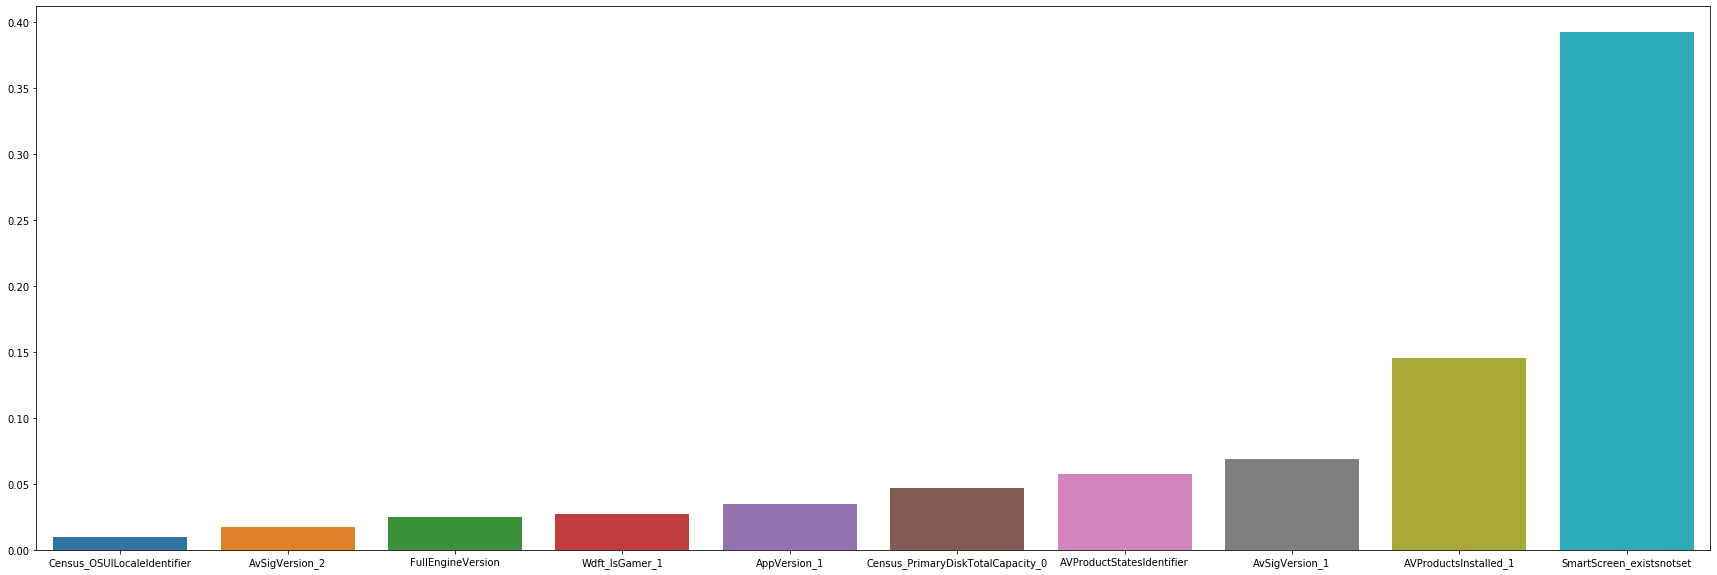

In [19]:
top10 = result_importances.argsort()[-10:]

f, ax = plt.subplots(1, 1, figsize=(30, 10))

print("Mean score: %f" % score_mean)
print("Max  score: %f" % score_max)

sns.barplot(
    X.columns[top10], 
    result_importances[top10], 
    ax=ax,
    order=X.columns[top10]
)